In [1]:
import pandas as pd
import numpy as np

url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'

tmp = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України')
table = tmp[0]
table.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [ ]:
print(table.shape)

In [ ]:
table = table.replace('—', np.nan)

print(table)
# print(table1)

In [ ]:
print(table.dtypes)

In [ ]:
table['2014'] = table['2014'].astype(float)
table['2019'] = table['2019'].astype(float)

In [ ]:
miss_info = (table.isnull().sum()/len(table))*100
print(miss_info)

In [ ]:
drop = table[table['Регіон'] != "Україна"]
print(drop)

In [ ]:
# for column in table.columns:
#     if table[column].dtype != 'object':
#         table[column].fillna(table[column].mean(numeric_only=True))
# print(table)

table = table.fillna(table.mean(numeric_only=True))
table

In [ ]:
print(table[table['2019']>table['2019'].mean()])

In [ ]:
print(table.loc[table['2014'].idxmax()])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'Крим'),
  Text(1, 0, 'Вінницька'),
  Text(2, 0, 'Волинська'),
  Text(3, 0, 'Дніпропетровська'),
  Text(4, 0, 'Донецька'),
  Text(5, 0, 'Житомирська'),
  Text(6, 0, 'Закарпатська'),
  Text(7, 0, 'Запорізька'),
  Text(8, 0, 'Івано-Франківська'),
  Text(9, 0, 'Київська'),
  Text(10, 0, 'Кіровоградська'),
  Text(11, 0, 'Луганська'),
  Text(12, 0, 'Львівська'),
  Text(13, 0, 'Миколаївська'),
  Text(14, 0, 'Одеська'),
  Text(15, 0, 'Полтавська'),
  Text(16, 0, 'Рівненська'),
  Text(17, 0, 'Сумська'),
  Text(18, 0, 'Тернопільська'),
  Text(19, 0, 'Харківська'),
  Text(20, 0, 'Херсонська'),
  Text(21, 0, 'Хмельницька'),
  Text(22, 0, 'Черкаська'),
  Text(23, 0, 'Чернівецька'),
  Text(24, 0, 'Чернігівська'),
  Text(25, 0, 'Київ'),
  Text(26, 0, 'Севастополь'),
  Text(27, 0, 'Україна')])

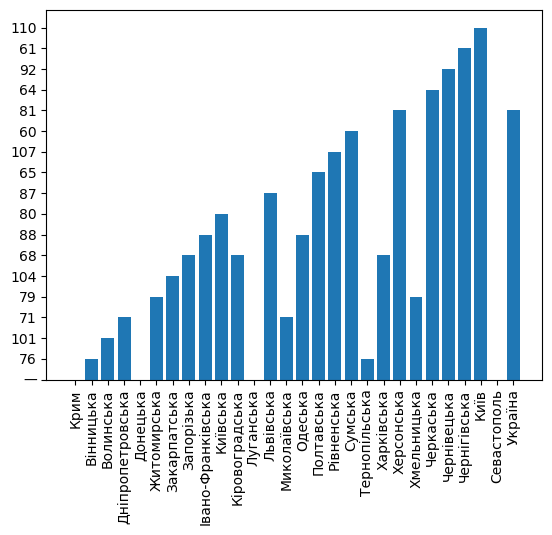

In [2]:
import matplotlib.pyplot as plt

plt.bar(
    table['Регіон'],
    table['2019']
)
plt.xticks(rotation=90)

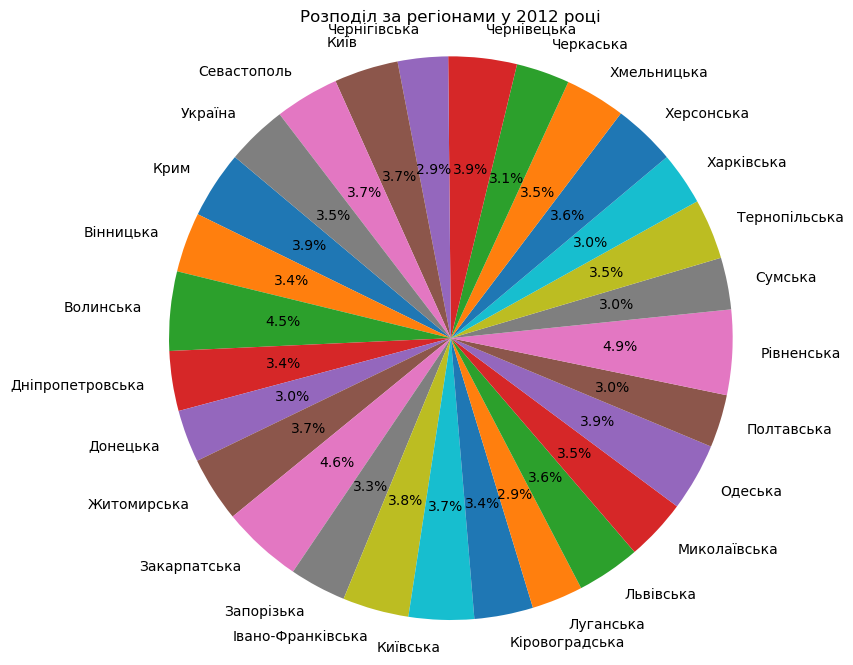

In [4]:
regions = table['Регіон']
values_2012= table['2012']
plt.figure(figsize=(8, 8))  
plt.pie(values_2012, labels=regions, startangle=140, autopct='%1.1f%%')
plt.title('Розподіл за регіонами у 2012 році')
plt.axis('equal') 
plt.show()

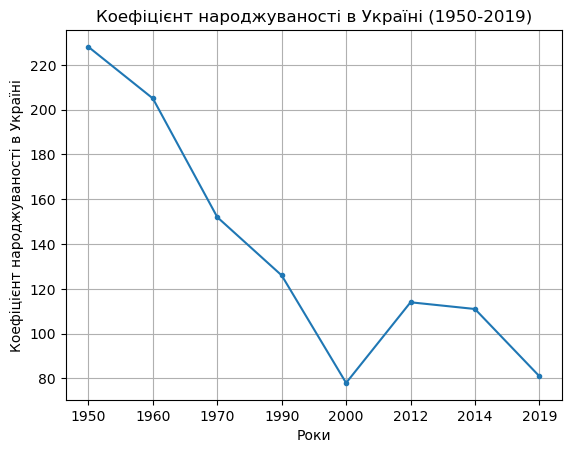

In [5]:
x_data=(table.columns[1:])
y_data=table.iloc[27][1:]
plt.plot(
    x_data, y_data, marker='.',
    linestyle='-' )
plt.xlabel('Роки')
plt.ylabel('Коефіцієнт народжуваності в Україні')
plt.title('Коефіцієнт народжуваності в Україні (1950-2019)')
plt.grid()
plt.show()